In [4]:
import pandas as pd
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
128,6.4,2.8,5.6,2.1,virginica
26,5.0,3.4,1.6,0.4,setosa


#Selecting, Filtering, Sorting



In [9]:
df['sepal_length'].head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [10]:
df[['sepal_length','sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
df[df['petal_length'] > 1.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
11,4.8,3.4,1.6,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa


In [12]:
df.sort_values('sepal_length', ascending=False).head()


,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


# GroupBy & Aggregation


In [13]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [14]:
df.groupby('species').agg(['mean', 'min', 'max'])

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.418  2.3  4.4        1.464  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.244  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

In [15]:
df.groupby('species').agg({
    'sepal_length': ['mean', 'max', 'min'],
    'petal_length': ['mean', 'max', 'min']
})

sepal_length           petal_length          
                   mean  max  min         mean  max  min
species                                                 
setosa            5.006  5.8  4.3        1.464  1.9  1.0
versicolor        5.936  7.0  4.9        4.260  5.1  3.0
virginica         6.588  7.9  4.9        5.552  6.9  4.5

In [16]:
df.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50



#Data Visualization with Matplotlib & Seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

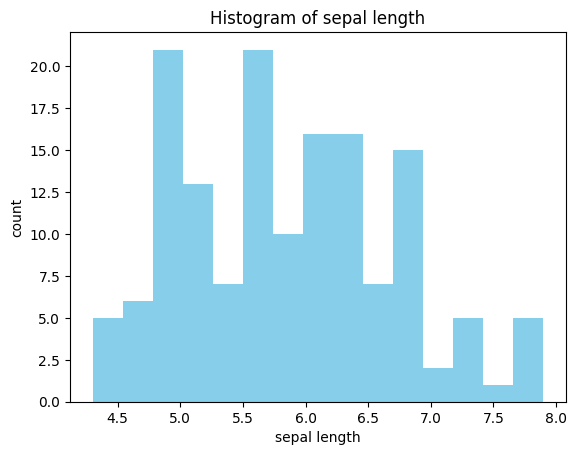

In [18]:
plt.hist(df['sepal_length'],bins = 15,color ='skyblue')
plt.title("Histogram of sepal length")
plt.xlabel('sepal length')
plt.ylabel('count')
plt.show()

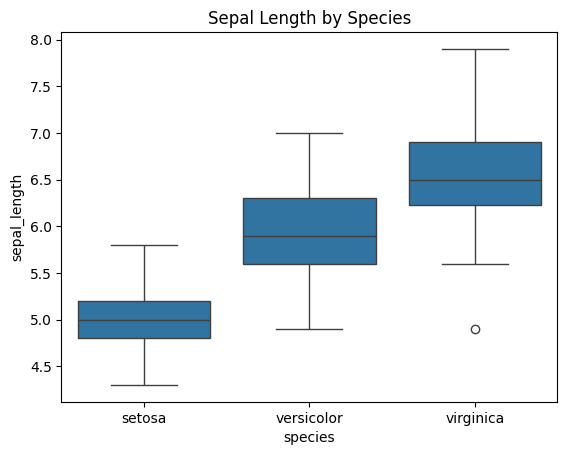

In [19]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.show()

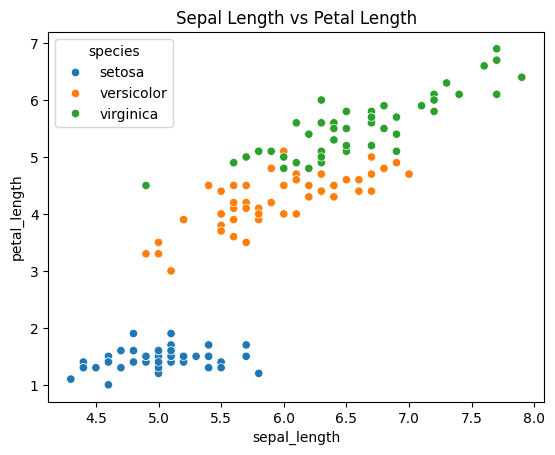

In [20]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.show()

In [23]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y=df['species']

In [26]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 101)

In [27]:
from sklearn.linear_model  import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
model_predict =model.predict(X_test)
model_predict

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model_predict)

1.0